In [20]:
import torch
import numpy as np
from models import *
import os
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import dm_control2gym

In [21]:
# env = dm_control2gym.make(domain_name="walker", task_name="walk")
env = gym.make('Pendulum-v0')
# gym.envs.register(id='lin-dyn-v0', entry_point='gym_linear_dynamics.envs:LinDynEnv',)
# env = gym.make('lin-dyn-v0')

In [22]:
max_torque = float(env.action_space.high[0])
device = 'cpu'
file_location = '/scratch/gobi1/abachiro/paml_results'

states_dim = env.observation_space.shape[0]

actions_dim = env.action_space.shape[0]
salient_states_dim = 3
states_dim = 120
P_hat = DirectEnvModel(states_dim, actions_dim, max_torque, model_size='constrained', hidden_size=1)
P_hat.double()

# file_name = 'model_mle_checkpoint_state24_salient24_actorcritic_dm-Walker-v0_horizon1_traj1001_0.pth'
file_name = 'model_mle_checkpoint_state120_salient3_actorcritic_Pendulum-v0_horizon1_traj201_hidden1_criticfull_actorrestrict_rho0_real5_virt500_constrainedModel_4.pth'

actor = DeterministicPolicy(states_dim, actions_dim, max_torque).double()
# P_hat.load_state_dict(torch.load(os.path.join(file_location,file_name), map_location=device))

In [23]:
stablenoise = StableNoise(states_dim, salient_states_dim, 0.992)

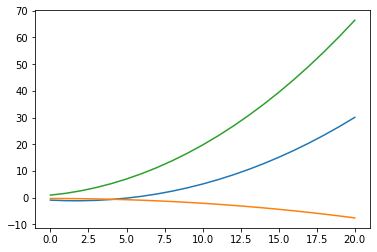

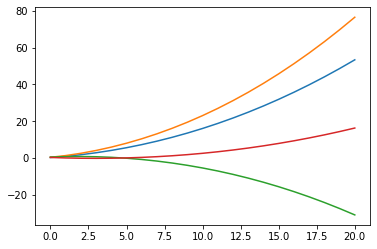

In [24]:

env.seed(0)
torch.manual_seed(0)
np.random.seed(0)

state = env.reset()
statemod = state
state = stablenoise.get_obs(state, 0)

states = [state]
actions = []
rewards = []
for timestep in range(20):
#     print(state)
    action = actor.sample_action(torch.DoubleTensor(state)).detach()#.numpy()
#     state_prime, reward, done, _ = env_lin.step(action.numpy())
#     state_prime, reward, done, _ = env.step(action.numpy())
#     state_prime = stablenoise.get_obs(state_prime, timestep+1)
#     state_prime_delta = P_hat(torch.cat((torch.DoubleTensor(state), action),0)).detach()
#     state_prime = state_prime_delta + torch.DoubleTensor(state)
    state_prime = P_hat.predict(torch.DoubleTensor(state).unsqueeze(0), action.unsqueeze(0)).detach().squeeze(0)
    actions.append(action.numpy())
    states.append(state_prime.numpy())
    state = state_prime

np_states = np.stack(states)

plt.plot(np_states[:,0])
plt.plot(np_states[:,1])
plt.plot(np_states[:,2])
# plt.plot(np_states[:,3])
plt.show()
plt.figure()
plt.plot(np_states[:,20])
plt.plot(np_states[:,21])
plt.plot(np_states[:,22])
plt.plot(np_states[:,23])
# plt.plot(np_states[:,20])
plt.show()

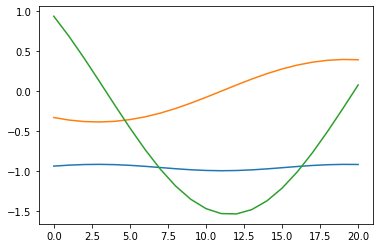

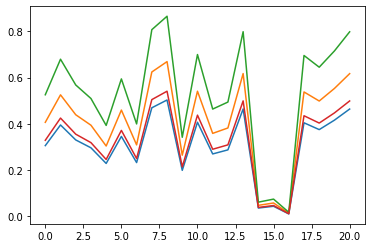

In [25]:
env.seed(0)
torch.manual_seed(0)
np.random.seed(0)

state = env.reset()
statetrue = state
state = stablenoise.get_obs(state, 0)
states = [state]
actions = []
rewards = []
for timestep in range(20):
#     print(state)
    action = actor.sample_action(torch.DoubleTensor(state)).detach()#.numpy()
    state_prime, reward, done, _ = env.step(np.zeros(2))#action.numpy())
    state_prime = stablenoise.get_obs(state_prime, timestep+1)
#     state_prime = P_hat(torch.cat((torch.DoubleTensor(state), action),0)).detach()
    actions.append(action)#.numpy())
    states.append(state_prime)#.numpy())
    state = state_prime
    
np_states = np.stack(states)

plt.plot(np_states[:,0])
plt.plot(np_states[:,1])
plt.plot(np_states[:,2])
# plt.plot(np_states[:,3])
plt.show()

plt.figure()
plt.plot(np_states[:,20])
plt.plot(np_states[:,21])
plt.plot(np_states[:,22])
plt.plot(np_states[:,23])
# plt.plot(np_states[:,20])
plt.show()

In [26]:
statetrue - statemod

array([0., 0., 0.])

In [7]:
env.seed(0)
np.random.seed(0)
env.reset()

array([ 0.63211317, -0.77487608, -0.00574165, -0.99998352,  0.99987122,
        0.016048  ,  0.72627802,  0.68740108,  0.07660845, -0.99706125,
        0.46232039, -0.88671295, -0.12383931, -0.99230228,  1.3       ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

In [8]:
env._seed(0)
np.random.seed(0)
env.reset()

array([-0.29415264,  0.95575845,  0.99012419,  0.14019307, -0.31294688,
        0.94977063, -0.82893103,  0.55935082, -0.52757145,  0.84951066,
       -0.92483887,  0.38035913, -0.9775589 , -0.21066229,  1.3       ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])